<a href="https://colab.research.google.com/github/gentryae/ML_classwork/blob/main/A8_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Deep Learning


In [88]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Housing Market Model HW

The data includes house size, number of bedrooms and house price. We are determining the output (house price) based on house size and number of bedrooms as inputs. 

In [89]:
# Create basic linear data from class slides
data = np.genfromtxt("housing_price_data.txt", delimiter=",")
data

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

# Feature Scaling

$$x_{new} = \frac{x-x_{min}}{x_{max}-x_{min}}$$

In [90]:
size = data_1[:,0] # returns the first columm.
num_rooms = data_1[:,1]
price = data_1[:,2]

x1_min = np.amin(size)
x2_min = np.amin(num_rooms)
y_min = np.amin(price)
# do this for y as well??? 

x1_max = np.amax(size)
x2_max = np.amax(num_rooms)
y_max = np.amax(price)

def scale(num, type):
  if type is 'x1':
    new_num = (num-x1_min)/(x1_max-x1_min)
  elif type is 'x2':
    new_num = (num-x2_min)/(x2_max-x2_min)
  else:
    new_num = (num-y_min)/(y_max-y_min)
  return new_num

fs = np.vectorize(scale)
new_x1 = fs(size,'x1')
new_x2 = fs(num_rooms,'x2')
new_y = fs(price,'y')

''' Rename data'''
data[:,0] = new_x1
data[:,1] = new_x2
data[:,2] = new_y
data

array([[0.34528406, 0.5       , 0.43396226],
       [0.20628792, 0.5       , 0.30188679],
       [0.42691671, 0.5       , 0.37566038],
       [0.1555433 , 0.25      , 0.11716981],
       [0.59238831, 0.75      , 0.69811321],
       [0.31246553, 0.75      , 0.24528302],
       [0.18808605, 0.5       , 0.27358491],
       [0.15857694, 0.5       , 0.05490377],
       [0.145615  , 0.5       , 0.07943396],
       [0.17705461, 0.5       , 0.13698113],
       [0.30005516, 0.75      , 0.13226226],
       [0.31660232, 0.5       , 0.33415094],
       [0.28626586, 0.5       , 0.30207358],
       [1.        , 1.        , 1.        ],
       [0.11472697, 0.5       , 0.16981132],
       [0.39933811, 0.75      , 0.52830189],
       [0.12906784, 0.25      , 0.24528302],
       [0.10590182, 0.5       , 0.05660377],
       [0.48455598, 0.75      , 0.62282642],
       [0.60093767, 0.75      , 0.80962264],
       [0.25234418, 0.5       , 0.15660377],
       [0.28571429, 0.25      , 0.16056604],
       [0.

In [96]:
data[0]

array([0.34528406, 0.5       , 0.43396226])

## Calculate model output given parameters
Calculate the output for a single training example. The formula for this for a single variable model is as follows:

$$h_\theta(x) = \theta_0 + \theta_1x_1$$

or more specifically to our syntax here:

$$\hat{y}_\theta(x) = \theta_0 + \theta_1x_1$$


In [83]:
# make up some initial thetas
theta_0 = 0.2
theta_1 = 0.8
theta_2 = 0.5

In [97]:
# get example 0
x1 = data[0][0]
x2 = data[0][1]
y = data[0][2]
x1, x2, y

(0.34528405956977387, 0.5, 0.4339622641509434)

In [98]:
# use formula for linear regression to get output
y_hat = theta_0 + theta_1 * x1 + theta_2 * x2
y_hat

0.7262272476558191

## Error, cost, and loss
Recall our overall cost (or loss) function: 

$$J(\theta) = \frac{1}{2m}\sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$

What is the error for this one training example given these model parameters?

In [99]:
# calculate basic error
error = y_hat - y
error

0.29226498350487573

What is the cost associated with this training example given these model parameters?

In [100]:
# calculate cost
cost = 0.5 * (error ** 2)
cost

0.04270941029155264

## Updating the model parameters based on gradient descent
What would gradient descent look like for this example? Recall:


$$\theta_j := \theta_j - \alpha(h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

or more specifically to our syntax here:

$$\theta_j := \theta_j - \alpha (\hat{y}_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

Keeping in mind:  
* _j_ denotes an individual parameter in a model. 
* _i_ denotes a particular training example

In [101]:
# new parameter - learning rate
alpha = 5e-1
alpha

0.5

In [102]:
# calculate update for theta 0
theta_0_new = theta_0 - alpha * (error) * 1
theta_0_new

0.053867508247562146

In [103]:
# calculate update for theta 1
theta_1_new = theta_1 - alpha * (error) * x1
theta_1_new

0.7495427800126718

In [104]:
# calculate update for theta 2
theta_2_new = theta_2 - alpha * (error) * x2
theta_2_new

0.4269337541237811

In [105]:
# do the update
theta_0 = theta_0_new
theta_1 = theta_1_new
theta_2 = theta_2_new

## Let's write some functions to help us out with training.

In [106]:
def calculate_single_forward(thetas, train_ex):
    '''
        thetas: theta0, theta1, ..., thetaj
        train_ex: (x, y)
        
        returns: gradients based on a single training example
    '''

    # parse model parameters
    theta_0 = thetas[0]
    theta_1 = thetas[1]
    theta_2 = thetas[2]

    # parse data inputs
    x0 = 1 # @@ maybe this needs to change??
    x1 = train_ex[0]
    x2 = train_ex[1]
    y = train_ex[2]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = theta_0 + theta_1 * x1 + theta_2 * x2
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1, error*x2])
    cost = 0.5 * (error ** 2)
    # Question: what would you do differently for GD or mini-batch GD?

    return gradients, cost

For the actual gradient descent, this is the update function:

$$\theta_j := \theta_j - \alpha \sum\limits_{i = 1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$


In [107]:
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''
    
    total_error = 0
    total_cost = 0
    overall_gradients = np.zeros(3) 

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients, cost = calculate_single_forward(thetas, ex)

        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_cost += cost
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1, theta_2 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]
    thetas[2] = theta_2 - alpha * overall_gradients[2]

    return thetas, total_error, total_cost

## Regression

In [116]:
# set initial parameters
thetas = [0.2, 0.8, 0.5]
old_thetas = thetas.copy()
alpha = 1e-4

# prepare training
total_epochs = 1500
error_traj = [0] * total_epochs
cost_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error, cost_error = gradient_descent(data, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error
    cost_traj[epoch] = cost_error
    

In [117]:
thetas

[-0.0690205615170093, 0.7263825432710929, 0.29167505556599743]

In [118]:
epoch_error

-0.11198588342199622

In [119]:
cost_error

0.4181172307996227

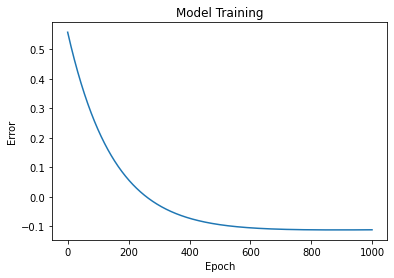

In [120]:
# Let's do an exploratory plot
plt.plot(error_traj[-1000:])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Model Training');

# Homework

### Final Computed Model Parameters

In [121]:
thetas

[-0.0690205615170093, 0.7263825432710929, 0.29167505556599743]

### Compute and plot the cost function as you perform the gradient descent 


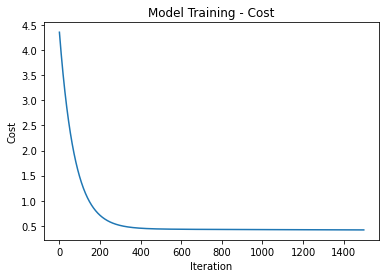

In [122]:
# Let's do an exploratory plot
plt.plot(cost_traj)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Model Training - Cost');

### Plot data with the linear model

Text(0.5, 1.0, 'Comparison of pre- vs post-model training')

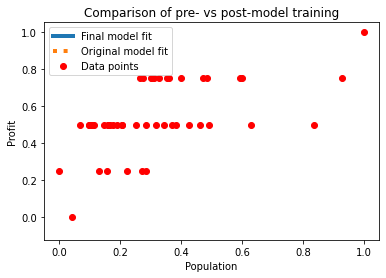

In [125]:
# Let's look at the actual least squares
lin_pts = np.linspace(0, 25, 1) # gives you 25 values between [0, 5]
mdl_pts = thetas[0] + lin_pts * thetas[1]
plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
plt.legend()

# Let's look at the original least squares
orig_mdl_pts = old_thetas[0] + lin_pts * old_thetas[1]
plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
plt.legend()

# Let's plot the original points
plt.plot(data[:,0], data[:,1], 'ro', label='Data points') # 'ro' for red, circle
plt.legend()
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Comparison of pre- vs post-model training')